In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy
# import gym
import lbforaging
from lbforaging.foraging import ForagingEnv

Matplotlib is building the font cache; this may take a moment.


In [2]:
from enum import Enum
from foraging_mdp import ForagingMDP, Action

In [3]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode="rgb_array"))
    plt.title(f" Step:{step} {info}")
    plt.axis('off')

def parse_starting_pos(nagents, obs, total_food):
    player_info = obs[0][total_food*3:]
    res = tuple()

    for i in range(nagents):
        res += (tuple(player_info[i*3:i*3+2]),)

    return res

In [4]:
nagents=2

In [5]:
env = ForagingEnv(players=nagents, max_player_level=2, field_size=(8,8), max_food=1, sight=8, force_coop=False, max_episode_steps=50)
test=env.reset()
actions = env.action_space.sample()
n_obs, reward, done, info = env.step(actions)

collisions dict_items([((0, 7), [<lbforaging.foraging.environment.Player object at 0x7f8c2b761ba8>]), ((4, 4), [<lbforaging.foraging.environment.Player object at 0x7f8c2b761c18>])])


/root/.venvs/csrl/lib/python3.6/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [6]:
test

(array([6., 1., 1., 0., 7., 1., 4., 3., 1.], dtype=float32),
 array([6., 1., 1., 4., 3., 1., 0., 7., 1.], dtype=float32))

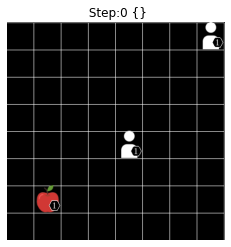

In [7]:
show_state(env, info=info)

In [8]:
env.close()

### creating dummy MDP and multicsrl object

In [8]:
label2 = np.empty((8,8),dtype=object)
label2.fill(())
mdp = ForagingMDP((8,8), label=label2,env=env)

all labels : [['f', 'e']]


In [9]:
mdp.get_transition_prob((0,0), Action.SOUTH)

([(1, 0), (0, 1)], [1.0, 0.0])

In [16]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl = '(e | XF e)'

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl, extra_aps = tuple('f',))

In [17]:
oa

In [18]:
from csrl import ControlSynthesis
# Construct product MDPs
csrl1 = ControlSynthesis(mdp,oa)
csrl2 = ControlSynthesis(mdp,oa)



In [19]:
# test parse starting obs

starts=parse_starting_pos(env.n_agents, test, env.get_total_food())

In [20]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis(np.array([csrl1,csrl2], dtype=object), mdp=mdp, starts=starts, oa=oa)

In [21]:
starts

((0.0, 7.0), (4.0, 3.0))

In [22]:
env.players[0].position

(0, 7)

In [23]:
test

(array([6., 1., 1., 0., 7., 1., 4., 3., 1.], dtype=float32),
 array([6., 1., 1., 4., 3., 1., 0., 7., 1.], dtype=float32))

In [25]:
Q = mcsrl.combined_learning(env, T= 100, K=10, debug=True)
Q.shape

- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)
- global labels:  ('e',)


(2, 1, 4, 8, 8, 10)

In [26]:
policy=np.argmax(Q[0],axis=4)
policy

array([[[[0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 2, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0]],

        [[2, 2, 2, 4, 2, 2, 5, 0],
         [5, 4, 4, 1, 0, 4, 0, 3],
         [4, 2, 4, 2, 2, 1, 1, 2],
         [2, 2, 2, 4, 0, 4, 4, 0],
         [5, 4, 0, 1, 4, 4, 4, 1],
         [3, 3, 1, 3, 1, 5, 1, 3],
         [3, 4, 3, 5, 2, 3, 2, 4],
         [1, 3, 4, 5, 3, 3, 3, 3]],

        [[0, 4, 2, 0, 0, 0, 0, 0],
         [0, 4, 1, 3, 4, 2, 3, 3],
         [4, 4, 2, 0, 2, 3, 3, 3],
         [0, 4, 2, 4, 5, 3, 0, 0],
         [4, 5, 3, 3, 3, 4, 5, 0],
         [1, 1, 1, 0, 1, 3, 3, 3],
         [0, 0, 5, 0, 0, 4, 1, 0],
         [0, 4, 1, 5, 0, 0, 1, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0

[None]

In [33]:
oa.delta[0]

{(): 0, ('e',): 0}

### Create the foraging MDP - link labels to ForagingEnv

### Create the automaton -> FG e

### initialize the Multi csrl 

### run combined_learning